# September 2020 Running Theme: Duration in Prime Number Minutes


This has been a strange year. To prevent getting Covid-19 cabin fever, I have run more miles than I did in the previous few years. To counter running fatigue, I needed to make running interesting. The theme of September 2020 is to make each run last until the number of minutes reaches a prime number > 20.

## Housekeeping Setup

In [1]:
import datetime as dt

In [2]:
import pathlib

In [3]:
import pandas as pd

In [4]:
pd.set_option('mode.chained_assignment','warn')

In [5]:
home = pathlib.Path.home()

In [6]:
date_partition = "20200925"

In [7]:
data_input_path = f"{home}/small-data/apple-health-csv/full-extract/{date_partition}"

In [8]:
study_path = f"{home}/small-data/study/running-stories/{date_partition}"

In [9]:
pathlib.Path(study_path).mkdir(parents=True,exist_ok=True)

In [10]:
workout = pd.read_csv(f"{data_input_path}/workout.csv",parse_dates=['startDate'], infer_datetime_format=True)

## Extract Runs From Workout Data

In [11]:
date_lowerbound = dt.datetime(2020, 9, 1).astimezone()

In [12]:
runs = workout.loc[(workout['workoutActivityType'] == 'HKWorkoutActivityTypeRunning') & 
                   (workout['startDate'] >= date_lowerbound), 
                   ['startDate', 'totalDistance', 'duration']]

In [13]:
runs = runs.rename(columns={
    'startDate': 'start_date',
    'totalDistance': 'miles',
    'duration': 'minutes'
})
                  

## Update Runs DataFrame "Schema"

In [14]:
runs["day"] = runs['start_date'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [15]:
runs.index = runs['day']

In [16]:
runs["prime_minutes"] = runs["minutes"].apply(lambda x: round(x))

In [17]:
# The prime_minutes list accomplishes the following: 
#
# 1. Eliminates quarter-mile "sprint"
# 2. Eliminates a run cut short by extremely poor air quality (109 seconds below a prime number minute).
#

prime_minutes = [23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73] 

In [18]:
runs = runs[runs['prime_minutes'].isin(prime_minutes)]

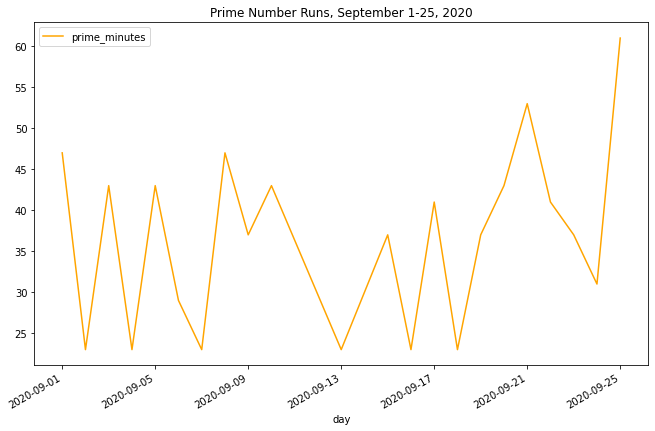

In [19]:
runs_plot = runs.plot.line(y=['prime_minutes'], 
                           title='Prime Number Runs, September 1-25, 2020', 
                           color = 'orange',
                           figsize=(11, 7))

In [20]:
runs_plot.get_figure().savefig(f"{study_path}/sep2020_prime_lineplot")

In [21]:
grouped_primes = runs.groupby('prime_minutes').count()

In [22]:
grouped_primes

,start_date,miles,minutes,day
prime_minutes,,,,
23,6,6,6,6
29,1,1,1,1
31,1,1,1,1
37,4,4,4,4
41,2,2,2,2
43,4,4,4,4
47,2,2,2,2
53,1,1,1,1
61,1,1,1,1


In [23]:
grouped_primes.axes

[Int64Index([23, 29, 31, 37, 41, 43, 47, 53, 61], dtype='int64', name='prime_minutes'),
 Index(['start_date', 'miles', 'minutes', 'day'], dtype='object')]

In [24]:
grouped_primes.axes[1]

Index(['start_date', 'miles', 'minutes', 'day'], dtype='object')

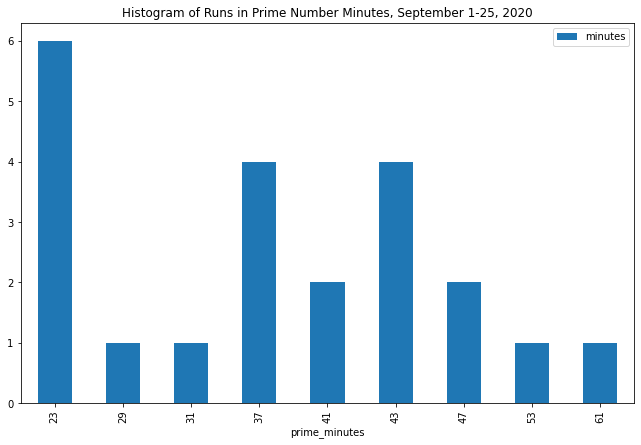

In [25]:
barplot = grouped_primes.plot.bar(y=grouped_primes.axes[1][2], 
                                  title = "Histogram of Runs in Prime Number Minutes, September 1-25, 2020",
                                  figsize=(11, 7))

In [26]:
barplot.get_figure().savefig(f"{study_path}/sep2020_prime_histogram")